# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the dataset

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.drop(["Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1, inplace=True)

In [9]:
df.shape

(891, 5)

In [10]:
duplicated_rows = df[df.duplicated()]
duplicated_rows.count()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
dtype: int64

In [12]:
df['Age'].fillna(df.Age.mean(), inplace=True)

**Create a pie chart presenting the male/female proportion**

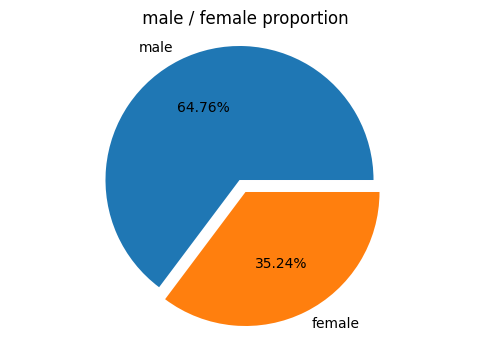

In [13]:
totalSex = df.Sex.value_counts().reset_index()
totalSex
plt.figure(figsize=(6,4))
plt.pie(totalSex['count'],labels=totalSex['Sex'], autopct="%1.2F%%" , explode=[0.1,0])
plt.title(" male / female proportion")
plt.axis('equal') 
plt.show()

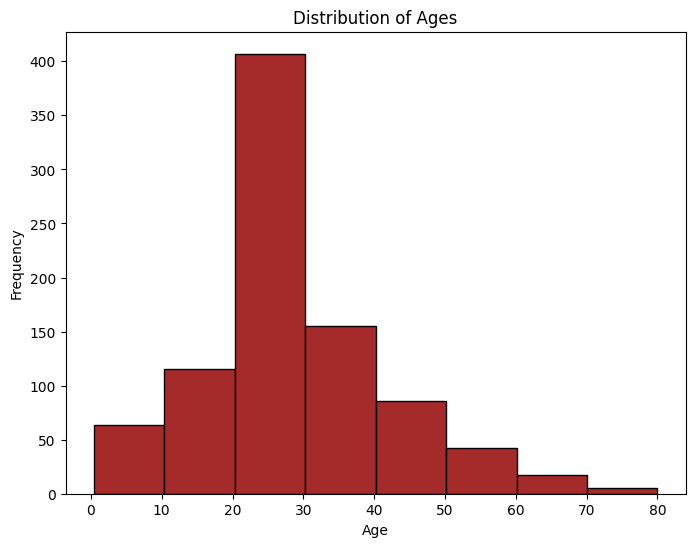

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=8, color='brown', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

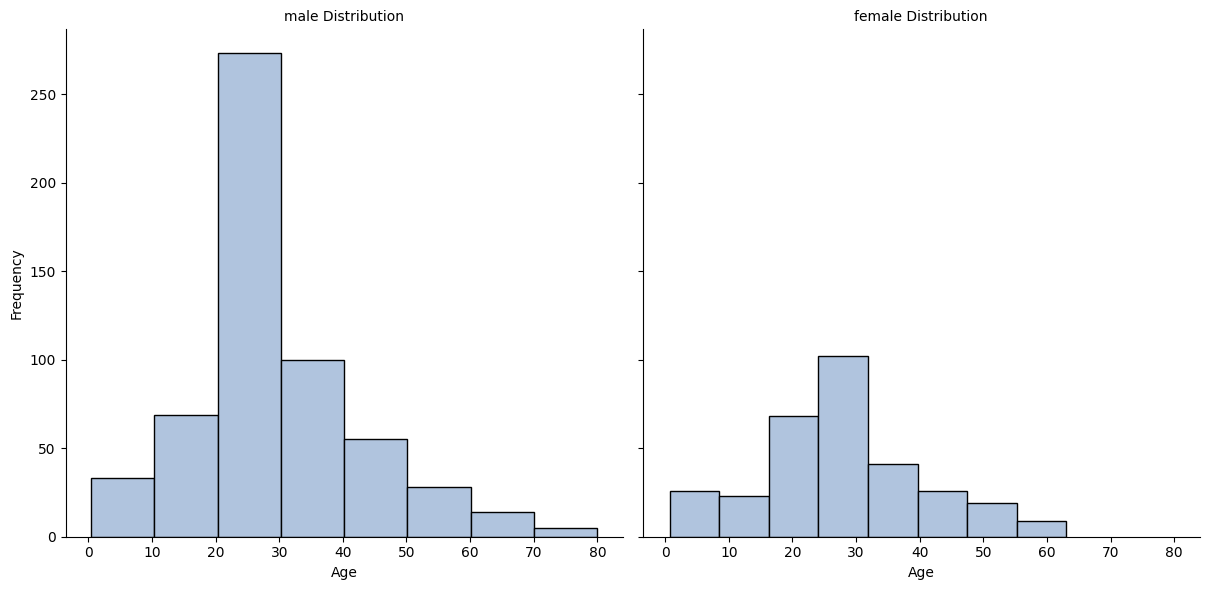

In [22]:
g = sns.FacetGrid(df, col='Sex', height=6, aspect=1)
g.map(plt.hist, 'Age', bins=8, color='lightsteelblue', edgecolor='black')

g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='{col_name} Distribution')
plt.show()

In [18]:
gc = df['Sex'].value_counts()
gc

Sex
male      577
female    314
Name: count, dtype: int64

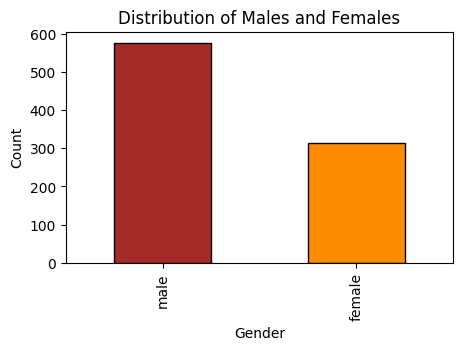

In [19]:
plt.figure(figsize=(5, 3))
gc.plot(kind='bar', color=['brown', 'darkorange'], edgecolor='black')
plt.title('Distribution of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()